In [1]:
import mglearn
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from IPython.display import display 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from numpy.linalg import inv

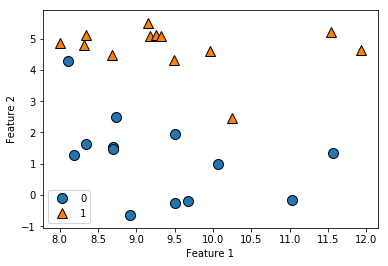

In [343]:
#import dataset to use for classification 
X,y = mglearn.datasets.make_forge()
#scatterplot of data 
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [344]:
#m is the number of training examples
m = (X[:,1]).size
#create a column of ones and add it to the X-matrix 
col_ones = np.ones((m,1))
X_new = np.append(col_ones,X,axis=1)
#n is the number of features 
n = len(X_new[1,:])
#convert labels y to a matrix- this makes matrix computations easier 
y_new = np.asmatrix(y).transpose()
#create Theta matrix which will serve as our parameters we will learn, initialized with all zeros 
Theta = np.zeros((n,1))
#create empty matrix J_history- this will be used to keep track of the cost during gradient descent 

In [345]:
#create sigmoid function
def sigmoid(z):
    return 1./(1+np.exp(-z))

In [378]:
#this function computes the Hessian matrix for a given Theta 
def Hess_comp(X,y,thet):
    Hessian = np.zeros((len(X[0,:]),len(X[0,:])))
    for i in range(0,len(X)):
        Hessian+=(1./X[:,0].size)*((sigmoid(X[i,:].dot(thet))*(1-sigmoid(X[i,:].dot(thet))))[0]*(np.asmatrix(X[i,:]).T)*(X[i,:]))
    return Hessian

In [379]:
#This function computes the gradient vector for a given Theta 
def Grad_comp(X,y,thet):
    gradient = np.zeros((len(X[0,:]),1))
    for i in range(0,len(X)):
        gradient+=((1./X[:,0].size)*(sigmoid(X[i,:].dot(thet))-y[i])*X[i,:]).T
    return gradient

In [348]:
#Here we implement Newton's Method for a given number of iterations 
for iter in range(0,15):
    hess = Hess_comp(X_new,y_new,Theta)
    grad = Grad_comp(X_new,y_new,Theta)
    Theta = Theta-(inv(hess).dot(grad))

In [349]:
#Now that we have our optimal Theta this function makes predictions for each training example and classifies them
def predict(X,y,theta):
    predictions = np.zeros((y.size,1))
    for i in range(0,len(X)):
        if(sigmoid(np.dot(X[i,:],theta))>=0.5):
            predictions[i] = 1
        else:
            predictions[i] = 0
    return predictions 

In [350]:
#call the predict function to make the predictions based on optimal Theta values above 
predictions=predict(X_new,y_new,Theta)

In [351]:
#Here we compute our Training rate accuracy and see our classifier predicted 92.3% of our training data correctly 
from fractions import Fraction
count=0
for i in range(0,m):
    if(predictions[i]==y_new[i]):
        count+=1
print("Training Score: {:.5f}%".format(float(Fraction(count,m))*100))

Training Score: 96.15385%


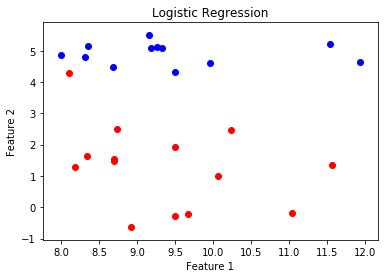

In [352]:
#This for loop goes over all our training data and plots each blue or red based on their predicted classes 0 and 1 respectively
for i in range(0,m):
    if(predictions[i]==1):
        plt.scatter(X[i,0],X[i,1],color='blue')
    else:
        plt.scatter(X[i,0],X[i,1],color = 'red')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression")
plt.show()

In [380]:
#Now we will use Logistic regression with Newton's method to classify breast cancer tumors as benign or malignent 
import sklearn
#import dataset and split into train and test sets 
from sklearn.model_selection import train_test_split 
data=sklearn.datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data['data'],data['target'],random_state=0)

In [381]:
print(data.target[[10, 50, 85]])
print(list(data.target_names))

[0 1 0]
['malignant', 'benign']


In [382]:
print(data.keys())

['target_names', 'data', 'target', 'DESCR', 'feature_names']


In [383]:
col_ones = np.ones((len(X_train),1))
X_train = np.append(col_ones,X_train,axis=1)
y_train = np.asmatrix(y_train).T
params = np.zeros((len(X_train[0,:]),1))
print(X_train.shape)
print(params.shape)

(426L, 31L)
(31L, 1L)


In [384]:
for iterations in range(0,2):
    Hess = Hess_comp(X_train,y_train,params)
    Grad = Grad_comp(X_train,y_train,params)
    params = params - (inv(Hess).dot(Grad))

In [385]:
train_predictions=predict(X_train,y_train,params)

In [386]:
#This function inputs our predictions and labels and outputs our training score
def train_accuracy(Pred,Y):
    from fractions import Fraction
    count = 0 
    for i in range(0,len(Pred)):
        if(Pred[i]==Y[i]):
            count+=1
    print("Training Set Accuracy: {:.5f}%".format(float(Fraction(count,len(Pred)))*100))

In [387]:
train_accuracy(train_predictions,y_train)

Training Set Accuracy: 96.94836%


In [388]:
col_ones = np.zeros((len(X_test),1))
X_test = np.append(col_ones,X_test,axis=1)
y_test = np.asmatrix(y_test).T

In [389]:
test_predictions = predict(X_test,y_test,params)

In [390]:
train_accuracy(test_predictions,y_test)

Training Set Accuracy: 37.06294%
